In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from matplotlib import pyplot as plt
df=pd.read_excel("C:/Users/avvic/Downloads/Assignment-1-Data.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


**Step 1: Data Hygiene**
We're going to do the following steps:
1. Drop any rows where item name column is null.
2. Drop any rows where item quantity sold is 0 or less.
3. Fill missing customer IDs with a placeholder ID (99999)
4. Create a new column, Sumprice, that tells us total sales revenue (Quantity * Price) of the item

In [ ]:
df.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [ ]:
#Dropping rows where ItemName isn't available
df.dropna(subset=["Itemname"],inplace=True)
#Dropping rows where Quantity <=0
df = df[df["Quantity"]>0]
df.isnull().sum()

BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    132113
Country            0
dtype: int64

In [ ]:
#Fill missing customer IDs
df['CustomerID'].fillna(99999, inplace=True)
#Create SumPrice column
df["SumPrice"]=df["Quantity"]*df["Price"]

**Step 2: EDA** Let's explore the data for any insights.
Let's find which countries sell the most items, and what items are the most popular in each country.

In [ ]:
#Find the best selling items in each country
best_selling_items = df.groupby(['Country', 'Itemname']).agg({'Quantity': 'sum'}).reset_index()
best_selling_items = best_selling_items.groupby('Country').apply(lambda x: x[x['Quantity'] == x['Quantity'].max()]).reset_index(drop=True)
best_selling_items.sort_values("Quantity",ascending=False)

,Country,Itemname,Quantity
47,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",80995
25,Netherlands,RABBIT NIGHT LIGHT,4801
12,France,RABBIT NIGHT LIGHT,4024
20,Japan,RABBIT NIGHT LIGHT,3408
0,Australia,MINI PAINT SET VINTAGE,2952
42,Sweden,MINI PAINT SET VINTAGE,2916
13,Germany,ROUND SNACK BOXES SET OF4 WOODLAND,1233
41,Spain,CHILDRENS CUTLERY POLKADOT PINK,729
43,Switzerland,PLASTERS IN TIN WOODLAND ANIMALS,639
26,Norway,SMALL FOLDING SCISSOR(POINTED EDGE),576


In [ ]:
#Find the total sales by country.
total_sales_country = df.groupby(['Country']).agg({'SumPrice': 'sum'}).reset_index()
total_sales_country = total_sales_country.sort_values('SumPrice', ascending=False).reset_index(drop=True)
total_sales_country

,Country,SumPrice
0,United Kingdom,9003097.964
1,Netherlands,285446.340
2,Germany,228867.140
3,France,209715.110
4,Australia,138521.310
5,Spain,61577.110
6,Switzerland,57089.900
7,Belgium,41196.340
8,Sweden,38378.330
9,Japan,37416.370


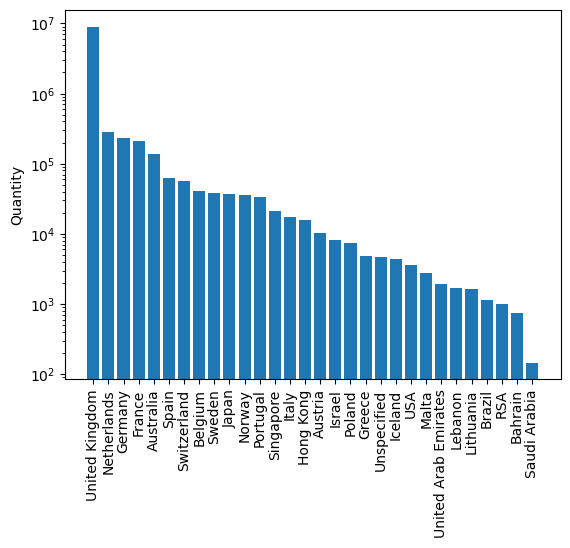

In [ ]:
#Visualizing Total sales by country.
plt.bar(total_sales_country["Country"],total_sales_country["SumPrice"])
plt.yscale('log')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()

So far we've noticed that the UK has the most amount of sales and the most popular item sold in UK is 'PAPER CRAFT, LITTLE BIRDIE'. However, this outsells the most popular items in other countries by a large magnitude. Let's dig in by only looking at UK's grocery store data.

In [ ]:
#Isolate the UK data and let's sort the most popular items in UK by quantity sold.
only_uk = df[df["Country"]=="United Kingdom"]
only_uk.groupby("Itemname")["Quantity"].sum().sort_values(ascending=False)

Itemname
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77036
WORLD WAR 2 GLIDERS ASSTD DESIGNS     49526
JUMBO BAG RED RETROSPOT               44268
WHITE HANGING HEART T-LIGHT HOLDER    35744
                                      ...  
HEN HOUSE W CHICK IN NEST                 1
BLACKCHRISTMAS TREE 30CM                  1
GOLD COSMETICS BAG WITH BUTTERFLY         1
WATERING CAN SINGLE HOOK PISTACHIO        1
*Boombox Ipod Classic                     1
Name: Quantity, Length: 4046, dtype: int64

In [ ]:
#Let's find out what items, across the globe, bring in the most revenue.
total_sales_item = df.groupby(['Itemname']).agg({'Price': 'mean', 'Quantity': 'sum', 'SumPrice': 'sum'}).reset_index()

# Create a new column with the count of rows for each group
total_sales_item['Count'] = df.groupby(['Itemname']).size().values

# Sort the dataframe by 'SumPrice' column in descending order
total_sales_item = total_sales_item.sort_values("SumPrice", ascending=False)

total_sales_item

,Itemname,Price,Quantity,SumPrice,Count
1060,DOTCOM POSTAGE,291.311822,708,206248.77,708
2386,"PAPER CRAFT , LITTLE BIRDIE",2.080000,80995,168469.60,1
2848,REGENCY CAKESTAND 3 TIER,14.043347,13119,165689.19,1930
3840,WHITE HANGING HEART T-LIGHT HOLDER,3.220569,36527,102588.37,2269
2411,PARTY BUNTING,5.808664,17812,97367.48,1677
...,...,...,...,...,...
4025,allocate stock for dotcom orders ta,0.000000,4,0.00,1
4026,amazon,0.000000,161,0.00,8
4027,amazon adjust,0.000000,10,0.00,1
4028,amazon sales,0.000000,20,0.00,1


Interesting. We find out that the most sold item globally, 'PAPER CRAFT, LITTLE BIRDIE' was sold in just one transaction. Perhaps this was a large corporate order. If we were to ever do a marketing or promotional push in the future, that required us to analyse our most popular products, this would be an anomaly that we would need to adjust for.

**Step 3: EDA** Market Basket Analysis using Apriori Algorithm and Association Rule Mining
1. Convert the Dataset into transactional format (Each row is one bill number with every item sold in that bill in a list)
2. Create a one-hot matrix of the products (Product sold = 1, Not sold = 0)
3. Merge the transactional matrix and the one hot matrix
4. Import the mlxtend library and perform association mining and generate association rules

In [ ]:
#Convert the dataset into transactional format
transactions = df.groupby(['BillNo'])['Itemname'].apply(list)
transactions

BillNo
536365     [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
536366     [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
536367     [ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...
536368     [JAM MAKING SET WITH JARS, RED COAT RACK PARIS...
536369                            [BATH BUILDING BLOCK WORD]
                                 ...                        
581586     [LARGE CAKE STAND  HANGING STRAWBERY, SET OF 3...
581587     [CIRCUS PARADE LUNCH BOX, PLASTERS IN TIN CIRC...
A563185                                    [Adjust bad debt]
A563186                                    [Adjust bad debt]
A563187                                    [Adjust bad debt]
Name: Itemname, Length: 19735, dtype: object

In [ ]:
#Create a one-hot matrix of the products
one_hot = pd.get_dummies(df['Itemname'])
one_hot

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
522060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
522061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
522062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Add the BillNo column back to the one-hot encoded matrix
one_hot['BillNo']=df['BillNo']
one_hot

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode,BillNo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,536365
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,536365
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,536365
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,536365
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,536365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,581587
522060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,581587
522061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,581587
522062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,581587


In [ ]:
#Now, we group the One-Hot Matrix by BillNo and sum the values
one_hot = one_hot.groupby('BillNo').sum()
one_hot

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Now, we merge the one-hot encoded matrix, with the transactional data
transaction_matrix = pd.merge(transactions, one_hot, on='BillNo')
transaction_matrix

,Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,[BATH BUILDING BLOCK WORD],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,"[LARGE CAKE STAND HANGING STRAWBERY, SET OF 3...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581587,"[CIRCUS PARADE LUNCH BOX, PLASTERS IN TIN CIRC...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,[Adjust bad debt],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
 #Now we have to convert the product columns to 0s and 1s. We are converting sum values to binary as number doesn't matter
transaction_matrix[one_hot.columns[:-1]] = (transaction_matrix[one_hot.columns[:-1]] >= 1).astype(int)
transaction_matrix

,Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,[BATH BUILDING BLOCK WORD],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,"[LARGE CAKE STAND HANGING STRAWBERY, SET OF 3...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581587,"[CIRCUS PARADE LUNCH BOX, PLASTERS IN TIN CIRC...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,[Adjust bad debt],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
print(transaction_matrix.dtypes)

Itemname                        object
*Boombox Ipod Classic            int64
*USB Office Mirror Ball          int64
10 COLOUR SPACEBOY PEN           int64
12 COLOURED PARTY BALLOONS       int64
                                 ...  
wrongly coded 20713              int64
wrongly coded 23343              int64
wrongly marked                   int64
wrongly marked 23343             int64
wrongly sold (22719) barcode     uint8
Length: 4057, dtype: object


In [ ]:
transaction_matrix.iloc[:, 1:] = transaction_matrix.iloc[:, 1:].astype(bool)
#Perform frequent itemset mining
frequent_itemsets = apriori(transaction_matrix.iloc[:, 1:], min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.015809,(10 COLOUR SPACEBOY PEN)
1,0.012567,(12 MESSAGE CARDS WITH ENVELOPES)
2,0.017887,(12 PENCIL SMALL TUBE WOODLAND)
3,0.018242,(12 PENCILS SMALL TUBE RED RETROSPOT)
4,0.017887,(12 PENCILS SMALL TUBE SKULL)
...,...,...
1891,0.011249,"(JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAG..."
1892,0.011249,"(LUNCH BAG CARS BLUE, LUNCH BAG BLACK SKULL.,..."
1893,0.010388,"(LUNCH BAG CARS BLUE, LUNCH BAG BLACK SKULL.,..."
1894,0.010286,"(LUNCH BAG SUKI DESIGN, LUNCH BAG BLACK SKULL..."


In [ ]:
# generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(DOTCOM POSTAGE),(6 RIBBONS RUSTIC CHARM),0.035875,0.047732,0.010236,0.285311,5.977290,0.008523,1.332422,0.863685
1,(6 RIBBONS RUSTIC CHARM),(DOTCOM POSTAGE),0.047732,0.035875,0.010236,0.214437,5.977290,0.008523,1.227305,0.874439
2,(JAM MAKING SET PRINTED),(6 RIBBONS RUSTIC CHARM),0.056549,0.047732,0.011806,0.208781,4.373992,0.009107,1.203545,0.817611
3,(6 RIBBONS RUSTIC CHARM),(JAM MAKING SET PRINTED),0.047732,0.056549,0.011806,0.247346,4.373992,0.009107,1.253499,0.810041
4,(6 RIBBONS RUSTIC CHARM),(JAM MAKING SET WITH JARS),0.047732,0.055181,0.010337,0.216561,3.924538,0.007703,1.205988,0.782546
...,...,...,...,...,...,...,...,...,...,...
3337,(CHARLOTTE BAG PINK POLKADOT),"(RED RETROSPOT CHARLOTTE BAG, STRAWBERRY CHARL...",0.037395,0.013073,0.010286,0.275068,21.040551,0.009797,1.361406,0.989475
3338,(CHARLOTTE BAG SUKI DESIGN),"(STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG PINK ...",0.044337,0.012212,0.010286,0.232000,18.998008,0.009745,1.286183,0.991315
3339,(STRAWBERRY CHARLOTTE BAG),"(RED RETROSPOT CHARLOTTE BAG, CHARLOTTE BAG PI...",0.036281,0.012668,0.010286,0.283520,22.381034,0.009827,1.378031,0.991284
3340,(WOODLAND CHARLOTTE BAG),"(STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG PINK ...",0.041905,0.012364,0.010286,0.245466,19.853534,0.009768,1.308934,0.991166


In [ ]:
#Let's see the top 10 rules by lift
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2080,(HERB MARKER THYME),"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",0.011806,0.010641,0.010134,0.858369,80.666258,0.010009,6.985474,0.999403
2077,"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010641,0.011806,0.010134,0.952381,80.666258,0.010009,20.752065,0.998225
2081,(HERB MARKER ROSEMARY),"(HERB MARKER PARSLEY, HERB MARKER THYME)",0.011857,0.010641,0.010134,0.854701,80.321530,0.010008,6.809118,0.999400
2076,"(HERB MARKER PARSLEY, HERB MARKER THYME)",(HERB MARKER ROSEMARY),0.010641,0.011857,0.010134,0.952381,80.321530,0.010008,20.751001,0.998172
534,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.011806,0.011857,0.010996,0.931330,78.546183,0.010856,14.389831,0.999064
535,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.011857,0.011806,0.010996,0.927350,78.546183,0.010856,13.602194,0.999115
2079,(HERB MARKER PARSLEY),"(HERB MARKER THYME, HERB MARKER ROSEMARY)",0.011756,0.010996,0.010134,0.862069,78.400604,0.010005,7.170281,0.998989
2078,"(HERB MARKER THYME, HERB MARKER ROSEMARY)",(HERB MARKER PARSLEY),0.010996,0.011756,0.010134,0.921659,78.400604,0.010005,12.614647,0.998221
533,(HERB MARKER THYME),(HERB MARKER PARSLEY),0.011806,0.011756,0.010641,0.901288,76.667715,0.010502,10.011344,0.998748
532,(HERB MARKER PARSLEY),(HERB MARKER THYME),0.011756,0.011806,0.010641,0.905172,76.667715,0.010502,10.420950,0.998697


In [ ]:
import mpld3

# create scatter plot with x and y as lift and confidence values
fig, ax = plt.subplots()
scatter = ax.scatter(rules['lift'], rules['confidence'], alpha=0.5)

# Define tooltips
tooltips = []
for i in range(len(rules)):
    rule = rules.iloc[i]
    tooltip = f"Rule: {rule['antecedents']} -> {rule['consequents']}\nSupport: {rule['support']:.3f}\nConfidence: {rule['confidence']:.3f}\nLift: {rule['lift']:.3f}"
    tooltips.append(tooltip)

# Add tooltips to scatter plot using mpld3
mpld3.plugins.connect(fig, mpld3.plugins.PointHTMLTooltip(scatter, tooltips))

# Set axis labels and title
ax.set_xlabel("Lift")
ax.set_ylabel("Confidence")
ax.set_title("Association Rules Scatter Plot")

# Show the plot
mpld3.display()

In [ ]:
rules[(rules['lift'] > 40) & (rules['lift'] < 50)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
124,(BLUE POLKADOT CUP),(PINK POLKADOT CUP),0.016418,0.015505,0.010489,0.638889,41.204158,0.010234,2.726293,0.992017
125,(PINK POLKADOT CUP),(BLUE POLKADOT CUP),0.015505,0.016418,0.010489,0.676471,41.204158,0.010234,3.040164,0.991098
264,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.017938,0.014441,0.010996,0.612994,42.447170,0.010737,2.546626,0.994276
265,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.014441,0.017938,0.010996,0.761404,42.447170,0.010737,4.115997,0.990749
552,(JAM JAR WITH PINK LID),(JAM JAR WITH GREEN LID),0.016874,0.015100,0.011198,0.663664,43.951015,0.010944,2.928319,0.994020
553,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.015100,0.016874,0.011198,0.741611,43.951015,0.010944,3.804827,0.992230
1556,(REGENCY SUGAR BOWL GREEN),(REGENCY MILK JUG PINK),0.014897,0.015252,0.011148,0.748299,49.062083,0.010920,3.912377,0.994432
1557,(REGENCY MILK JUG PINK),(REGENCY SUGAR BOWL GREEN),0.015252,0.014897,0.011148,0.730897,49.062083,0.010920,3.660690,0.994790
1568,(REGENCY TEA PLATE ROSES),(REGENCY TEA PLATE PINK),0.021079,0.014289,0.012617,0.598558,41.888426,0.012316,2.455423,0.997146
1569,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE ROSES),0.014289,0.021079,0.012617,0.882979,41.888426,0.012316,8.365322,0.990277
